In [ ]:
## Notes:
'''
I added 2 challenges to the assignment. One, I wanted to ensure that I knew exactly the number 
of valid cities being returned by the call to the API.  In order to do that I added the call to a 
while loop. 

The second change I made was to make add linear regression lines for first and second order
relationships between eahc of the pair of variables. After plotting the first scatter it was
that there was a quadratic relationship so I added a quadriatic regression.


3 Trends:
1. The relationship between temperature and lattitude is a quadratic relationship where the further 
a city is from the equator the cooler it is.
2. There is a statiscally signifigant realtionship between lattitude and cloudiness but it looks like 
the coeffecient would be very small as the regrssion line is not very steep.
3. The relationship between humidity and lattitude is hard to evaluate with the data as is. Much of 
humidity data is clustered near or at 100%. I beleive transforming the data with an arcsine 
transformation would provide more valid results (I think?).

'''

In [50]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import seaborn as sns
import statsmodels.formula.api as sm
import datetime


# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

## Perform API Calls and Create DF from Responses

In [47]:
cities = []
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key +"&q="
#Temperature (F) vs. Latitude
temp = []
lat = []
# Humidity
hum = []
# Cloudiness
cloud = []
# Wind Speed (mph)
wind = []

#get cities one at a time until we have 600
while len(cities) < 600:
    lats = np.random.uniform(low=-90.000, high=90.000, size=1)
    lngs = np.random.uniform(low=-180.000, high=180.000, size=1)
    lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
    for lat_lng in lat_lngs:
        city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique and exists, then move to next loop
    if city not in cities and len(city)>0:


        #get response from api for city:
        response = requests.get(url + city).json()
        #try to get the city data
        try:
            temp.append(response['main']['temp'])
            lat.append(response['coord']['lat'])
            hum.append(response['main']['humidity'])
            cloud.append(response['clouds']['all'])
            wind.append(response['wind']['speed'])
            cities.append(city)
 
        #if city does not have data move on
        except: 
            pass 
            
#create dictionary from lists    
weather = {
           "City":cities,
           "Temperature":temp,
           "Latitude":lat,
           "Clouds": cloud,
           "Wind": wind,
           "Humidity": hum
          }

#create df from dictionary
weather_df = pd.DataFrame(weather) 
weather_df.head()

,City,Temperature,Latitude,Clouds,Wind,Humidity
0,kutum,78.22,14.20,0,9.19,28
1,klaksvik,50.00,62.23,44,17.22,81
2,lompoc,67.87,34.64,1,10.29,56
3,kapaa,83.08,22.08,75,19.46,84
4,busselton,59.14,-33.64,80,17.25,100


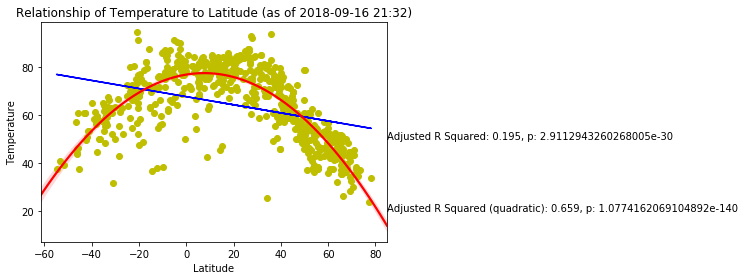

In [55]:
from numpy.polynomial import polynomial as P
x = weather_df['Latitude']
y = weather_df['Temperature']
now = datetime.datetime.now()

# plot scatter, add a regression line, calculate adjusted R Squared and annotate regression line
fit = np.polyfit(x,y,1)
fit_fn = np.poly1d(fit) 
plt.plot(x, y, 'yo', x, fit_fn(x), 'b')
simple_regression = sm.OLS(y,x).fit()
simple_r = str(round(simple_regression.rsquared_adj, 3))
p =  str(simple_regression.f_pvalue )
plt.annotate('Adjusted R Squared: '+simple_r+', p: '+ p,xy=(85, 50))


# add a quadtratic regression line, calculate adjusted R Squared and annotate regression line
data = {"y": y,"x":x }
model = sm.ols(formula = 'y ~ np.power(x, 2) + x', data = data).fit()
quadratic_r =  str(round(model.rsquared_adj , 3))
quadp = str(model.f_pvalue )
sns.regplot(x='Latitude', y='Temperature', data=weather_df, scatter=None, order=2, color='red', label='order 2')
plt.annotate('Adjusted R Squared (quadratic): '+ quadratic_r+', p: '+ quadp,xy=(85, 20))

plt.title('Relationship of Temperature to Latitude (as of '+str(now.strftime("%Y-%m-%d %H:%M"))+')', {'fontsize': 12,
 'fontweight' :1})


plt.tight_layout()
plt.show()

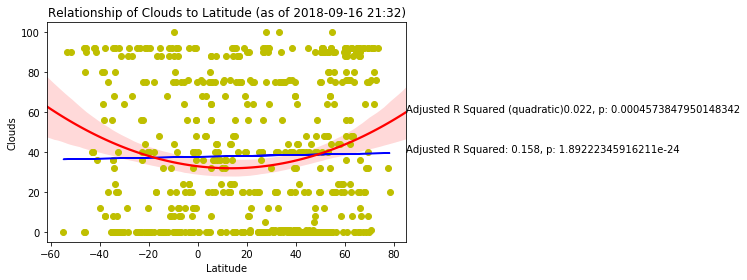

In [60]:

x = weather_df['Latitude']
y = weather_df['Clouds']

# plot scatter, add a regression line, calculate adjusted R Squared and annotate regression line
fit = np.polyfit(x,y,1)
fit_fn = np.poly1d(fit) 
plt.plot(x, y, 'yo', x, fit_fn(x), 'b')
simple_regression = sm.OLS(y,x).fit()
simple_r = str(round(simple_regression.rsquared_adj, 3))
p =  str(simple_regression.f_pvalue )
plt.annotate('Adjusted R Squared: '+simple_r+', p: '+ p,xy=(85, 40))


# add a quadtratic regression line, calculate adjusted R Squared and annotate regression line
data = {"y": y,"x":x }
model = sm.ols(formula = 'y ~ np.power(x, 2) + x', data = data).fit()
quadratic_r =  str(round(model.rsquared_adj , 3))
quadp = str(model.f_pvalue )
sns.regplot(x='Latitude', y='Clouds', data=weather_df, scatter=None, order=2, color='red', label='order 2')
plt.annotate('Adjusted R Squared (quadratic)'+ quadratic_r+', p: '+ quadp,xy=(85, 60))
plt.title('Relationship of Clouds to Latitude (as of '+str(now.strftime("%Y-%m-%d %H:%M"))+')', {'fontsize': 12,
 'fontweight' :1})

plt.tight_layout()
plt.show()


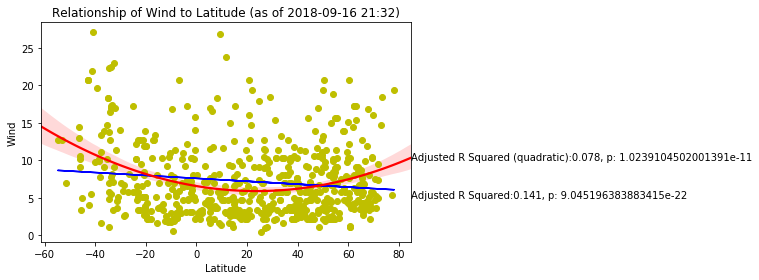

In [66]:

x = weather_df['Latitude']
y = weather_df['Wind']

# plot scatter, add a regression line, calculate adjusted R Squared and annotate regression line
fit = np.polyfit(x,y,1)
fit_fn = np.poly1d(fit) 
plt.plot(x, y, 'yo', x, fit_fn(x), 'b')
simple_regression = sm.OLS(y,x).fit()
simple_r = str(round(simple_regression.rsquared_adj, 3))
p =  str(simple_regression.f_pvalue)
plt.annotate('Adjusted R Squared:'+simple_r+', p: '+ p,xy=(85, 5))

# add a quadtratic regression line, calculate adjusted R Squared and annotate regression line
data = {"y": y,"x":x }
model = sm.ols(formula = 'y ~ np.power(x, 2) + x', data = data).fit()
quadratic_r =  str(round(model.rsquared_adj , 3))
quadp = str(model.f_pvalue )
sns.regplot(x='Latitude', y='Wind', data=weather_df, scatter=None, order=2, color='red', label='order 2')
plt.annotate('Adjusted R Squared (quadratic):'+ quadratic_r+', p: '+ quadp,xy=(85, 10))
plt.title('Relationship of Wind to Latitude (as of '+str(now.strftime("%Y-%m-%d %H:%M"))+')', {'fontsize': 12,
 'fontweight' :1})


plt.tight_layout()
plt.show()


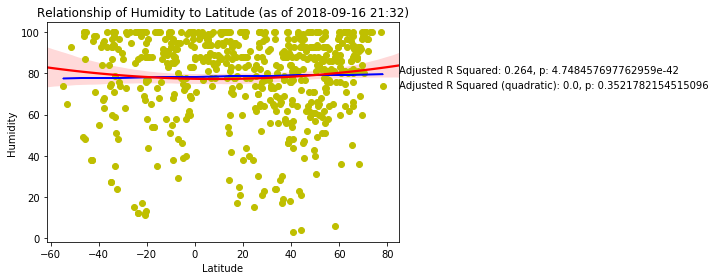

In [68]:
x = weather_df['Latitude']
y = weather_df['Humidity']

# plot scatter, add a regression line, calculate adjusted R Squared and annotate regression line
fit = np.polyfit(x,y,1)
fit_fn = np.poly1d(fit) 
plt.plot(x, y, 'yo', x, fit_fn(x), 'b')
simple_regression = sm.OLS(y,x).fit()
simple_r = str(round(simple_regression.rsquared_adj, 3))
p =  str(simple_regression.f_pvalue)
plt.annotate('Adjusted R Squared: '+simple_r+', p: '+ p,xy=(85, 80))


# add a quadtratic regression line, calculate adjusted R Squared and annotate regression line
data = {"y": y,"x":x }
model = sm.ols(formula = 'y ~ np.power(x, 2) + x', data = data).fit()
quadratic_r =  str(round(model.rsquared_adj , 3))
quadp = str(model.f_pvalue)
sns.regplot(x='Latitude', y='Humidity', data=weather_df, scatter=None, order=2, color='red', label='order 2')
plt.annotate('Adjusted R Squared (quadratic): '+ quadratic_r+', p: '+ quadp,xy=(85, 73))
plt.title('Relationship of Humidity to Latitude (as of '+str(now.strftime("%Y-%m-%d %H:%M"))+')', {'fontsize': 12,
 'fontweight' :1})

plt.tight_layout()
plt.show()
